# El tratamiento de las variables categóricas

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [64]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [65]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [66]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [67]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [68]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [69]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [70]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [71]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [72]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [73]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [74]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [75]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [76]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589545),
 ('Gender_Female', -131.02501325554567),
 ('Gender_Male', 131.0250132555456),
 ('City_Tier 1', 76.76432601049527),
 ('City_Tier 2', 55.138974309232474),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [77]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
    Total_Spend = -79.41713030137362 + 'Monthly Income' * 0.14753898049205738 
                                     + 'Transaction Time' * 0.15494612549589545
                                     + 'Gender_Female' * -131.02501325554567
                                     + 'Gender_Male' * 131.0250132555456
                                     + 'City_Tier 1' * 76.76432601049527
                                     + 'City_Tier 2' * 55.138974309232474
                                     + 'City_Tier 3' * -131.9033003197278
                                     + 'Record' * 772.2334457445648

In [78]:
#df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income'] * 0.14753898049205738 + df_new['Transaction Time'] * 0.15494612549589545 + df_new['Gender_Female'] * (-131.02501325554567)+ df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1'] * 76.76432601049527+ df_new['City_Tier 2'] * 55.138974309232474+ df_new['City_Tier 3'] * (-131.9033003197278)+ df_new['Record'] * 772.2334457445648
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [79]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [80]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.3408165

In [81]:
RSE = np.sqrt(SSD / (len(df_new)-len(feature_cols)-1))
RSE

803.1318809818166

In [82]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [83]:
error = RSE / sales_mean
error

0.13031135680294162

## Eliminar variables dummy redundantes

In [84]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [85]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [86]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [87]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Male", 
                "City_Tier 2", "City_Tier 3",
                "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [88]:
print(lm.intercept_)

-133.67781754642056


In [89]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589631),
 ('Gender_Male', 262.05002651109595),
 ('City_Tier 2', -21.62535170126296),
 ('City_Tier 3', -208.66762633022324),
 ('Record', 772.2334457445635)]

In [90]:
lm.score(X,Y)

0.9179923586131016

## Transformación de variables para conseguir una relación no lineal

In [91]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [92]:
data_auto.shape

(406, 9)

In [93]:
data_auto[data_auto["horsepower"].isnull()] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
133,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
337,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
343,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
361,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
382,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [94]:
data_auto[data_auto["cylinders"]==4] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4,133.0,115.0,3090,17.5,70,2,citroen ds-21 pallas
20,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii
24,27.0,4,97.0,88.0,2130,14.5,70,3,datsun pl510
25,26.0,4,97.0,46.0,1835,20.5,70,2,volkswagen 1131 deluxe sedan
26,25.0,4,110.0,87.0,2672,17.5,70,2,peugeot 504
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


Los valores faltantes para horsepower no parecen depender de otra variable del data set. Podriamos considerar que faltan de manera completamente aleatoria (MCAR)

In [95]:
# Veamos el porcentaje de valores NA para la variable horsepower
data_auto["horsepower"].isnull().mean()

0.014778325123152709

(array([ 28.,  95., 120.,  46.,  19.,  49.,  14.,  16.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

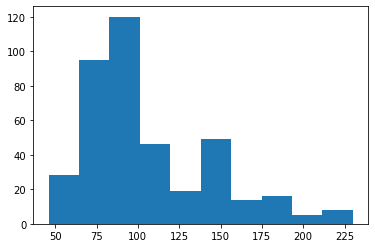

In [96]:
# Observemos la distribución de la variable horsepower
plt.hist(data_auto["horsepower"])

In [97]:
sk = sp.skew(data_auto["horsepower"].dropna())
sk

1.0301975833933195

El valor del skewness nos confirma lo observado en el gráfico. Los valores de horsepower presentan una asimetría positiva.

In [98]:
# El porcentaje de valores NA para la variable horsepower es inferior al 5 % y la distribucíon tiene sesgo hacia la derecha, 
# por tanto podemos considerar como método de imputación, la sustitución de las observaciones que contengan NAs 
# por la mediana de la variable
X = data_auto["horsepower"].fillna(data_auto["horsepower"].median())

Hagamos lo mismo para la variable **mpg**

In [99]:
# Veamos el porcentaje de valores NA para la variable mpg
data_auto["mpg"].isnull().mean()

0.019704433497536946

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

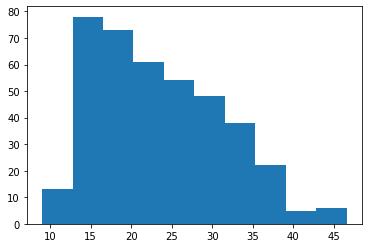

In [100]:
# Observemos la distribución de la variable mpg
plt.hist(data_auto["mpg"])

El valor del skewness nos confirma lo observado en el gráfico. Los valores de horsepower presentan una asimetría positiva. Es pequeña o menor en comparación con la observada para la variable horsepower.

In [101]:
sk = sp.skew(data_auto["mpg"].dropna())
sk

0.45534192556309266

In [102]:
# El porcentaje de valores NA para la variable mpg es inferior al 5 % y la distribucíon tiene sesgo hacia la derecha, 
# por tanto podemos considerar como método de imputación, la sustitución de las observaciones que contengan NAs 
# por la mediana de la variable
Y = data_auto["mpg"].fillna(data_auto["mpg"].median())

Text(0.5, 1.0, 'CV vs MPG')

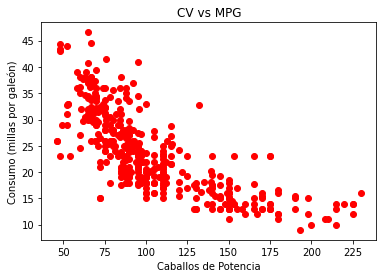

In [103]:
plt.plot(X,Y,"ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [104]:
type(X)

pandas.core.series.Series

In [105]:
X_data = X.to_numpy()[:,np.newaxis]

In [106]:
type(X_data)

numpy.ndarray

In [107]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

Text(0.5, 1.0, 'CV vs MPG')

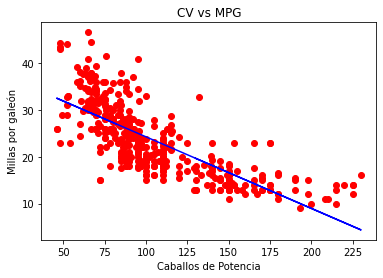

In [108]:
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X_data), color = "blue")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Millas por galeón")
plt.title("CV vs MPG")

In [109]:
lm.score(X_data,Y)

0.5790079544589217

In [110]:
def regression_validation(X_data,Y,Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD / (len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    return SSD,RSE,y_mean,error

In [111]:
print(regression_validation(X_data,Y,lm.predict(X_data)))

(10211.015567662416, 5.021193495344009, 23.504433497536954, 0.21362750546062653)


### Modelo de regresión cuadrático
* mpg = a + b * $\text{horsepower}^2$

In [112]:
X_data = X**2
X_data = X_data.to_numpy()[:,np.newaxis]

In [113]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [114]:
lm.score(X_data,Y)

0.48804957643544367

In [115]:
print(regression_validation(X_data,Y,lm.predict(X_data)))

(12417.179374898606, 5.53712038520416, 23.504433497536954, 0.2355777000872792)


### Modelo de regresión lineal y cuadrático
* mpg = a + b * $\text{horsepower}$ + c * $\text{horsepower}^2$

In [116]:
poly = PolynomialFeatures(degree=2)

In [117]:
X_data = poly.fit_transform(X.to_numpy()[:,np.newaxis])

In [118]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [119]:
lm.score(X_data,Y)

0.6508346085071222

In [120]:
lm.intercept_

55.38021229474256

In [121]:
lm.coef_

array([ 0.        , -0.44066825,  0.00115016])

mpg = 55.380 - 0.440 * $\text{hp}$ + 0.00115016 * $\text{hp}^2$

In [122]:
for d in range(2,8):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X.to_numpy()[:,np.newaxis])
    lm = LinearRegression()
    lm.fit(X_data,Y)
    print("Regresión de grado " + str(d))    
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    print(regression_validation(X_data,Y,lm.predict(X_data)))
    print("\n")

Regresión de grado 2
0.6508346085071222
55.38021229474256
[ 0.         -0.44066825  0.00115016]
(8468.885067983618, 4.572835808156095, 23.504433497536954, 0.1945520537066033)


Regresión de grado 3
0.6513977664531339
58.80811065572657
[ 0.00000000e+00 -5.33828923e-01  1.92185857e-03 -1.95806197e-06]
(8455.225867970974, 4.569146628044487, 23.504433497536954, 0.19439509693025744)


Regresión de grado 4
0.6544721878262866
37.60317151296383
[ 0.00000000e+00  2.63824094e-01 -8.50408195e-03  5.42423723e-05
 -1.06139809e-07]
(8380.656847403212, 4.54895371158373, 23.504433497536954, 0.19353598596879257)


Regresión de grado 5
0.6636404365110902
-49.438378223447934
[ 0.00000000e+00  4.39696990e+00 -8.21035092e-02  6.70762242e-04
 -2.54747990e-06  3.67488361e-09]
(8158.28416592319, 4.488196911990159, 23.504433497536954, 0.1909510779087903)


Regresión de grado 6
0.6656655440423602
-153.13182742510244
[ 0.00000000e+00  1.04254492e+01 -2.20044153e-01  2.26430444e-03
 -1.23808799e-05  3.45313336e-0

## El problema de los outliers

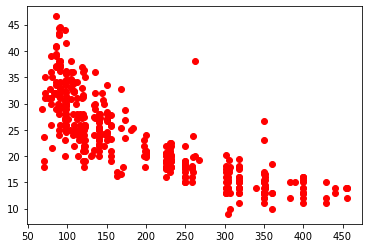

In [124]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

In [129]:
X = data_auto["displacement"].to_numpy()[:,np.newaxis]

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [131]:
lm.score(X,Y)

0.6273861779744581

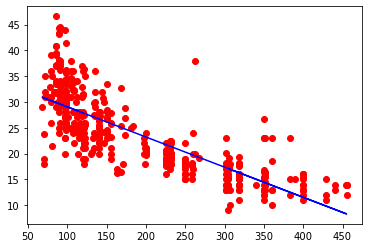

In [132]:
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X),color="blue")

In [134]:
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [135]:
data_auto[(data_auto["displacement"] > 300) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [136]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [138]:
X = data_auto_clean["displacement"].to_numpy()[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].median())

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [139]:
lm.score(X,Y)

0.6479057534749744

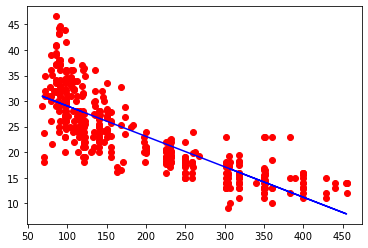

In [140]:
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X),color="blue")